# A Top 1% Approach to House Price Prediction Competition

##  Data Importing

In [71]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Import and get to know the Data.

In [80]:
train = pd.read_csv("htrain.csv")
test = pd.read_csv("htest.csv")

print("DF Dimensions:")
print("Train:")
train.shape
print("Test:")
test.shape

print("Take a look:")
print("Train:")
train.head()

print("Test:")
test.head()

print("Train:")
train.describe()
test.describe()

DF Dimensions:
Train:


(1460, 81)

Test:


(1459, 80)

Take a look:
Train:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Test:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Train:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There is total of 81 columns. Our Target is `SalesPrice` which we have to predict. Let's Clean up the data by dropping irrelevent columns and imputing NAs with appropriate Values

## Cleaning Data

Let's drop `Id` Column from both test and train sets. We keep it for later use.

In [81]:
#dropping Id column
train_id = train['Id']
test_id = test['Id']
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

Let's Explore Missing Values and impute them with appropriate values.

In [82]:
#Finding Missing features
missing_features = [col for col in train.columns if train[col].isnull().any()]
len(missing_features)

19

Percentage of Missing Values in each column

In [83]:
train.isnull().sum().sum() /np.product(train.shape) * 100
train[missing_features].isnull().sum().sort_values(ascending = False)/ len(train) * 100

5.9631849315068495

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [84]:
train[missing_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

We can visualize distribution and interelationships wiht `missingo` package.

<AxesSubplot:>

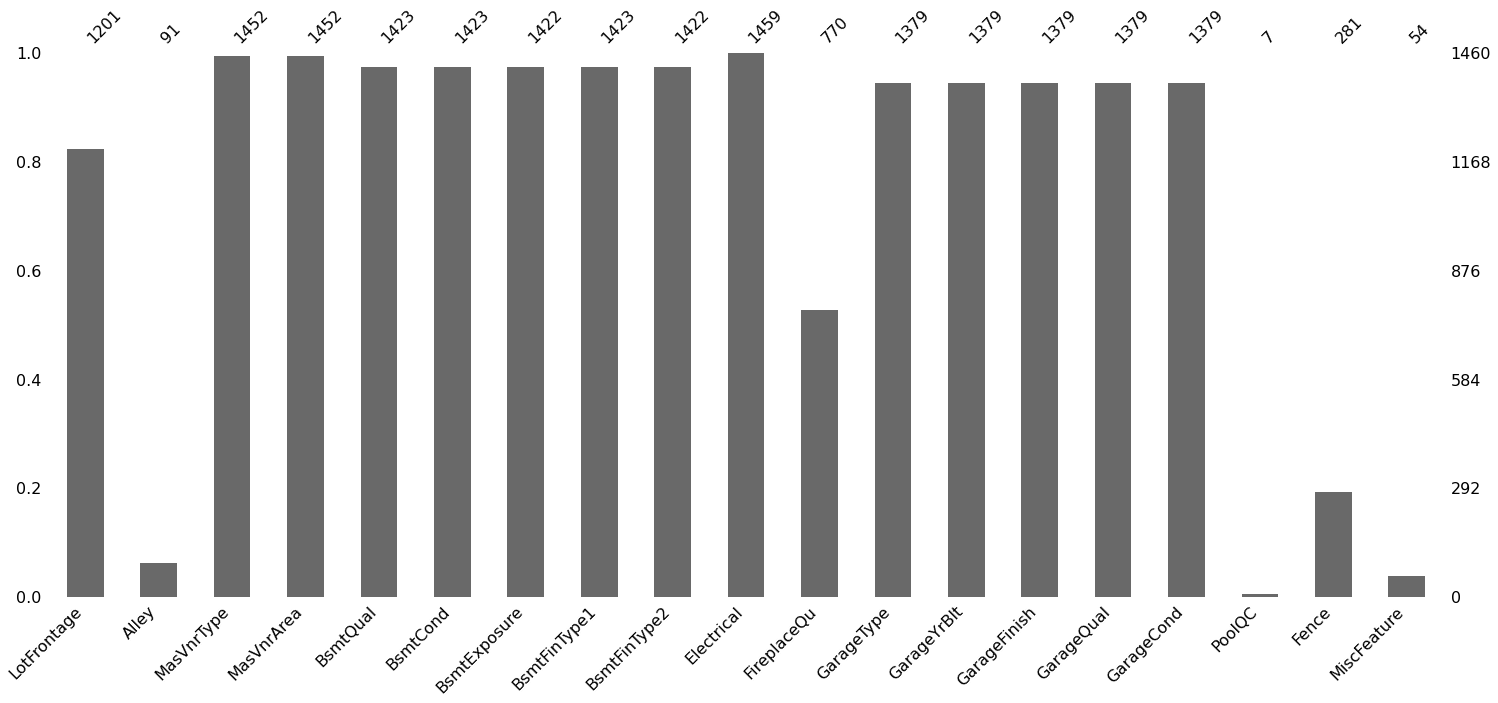

In [85]:
import missingno as msno
msno.bar(train[missing_features])

<AxesSubplot:>

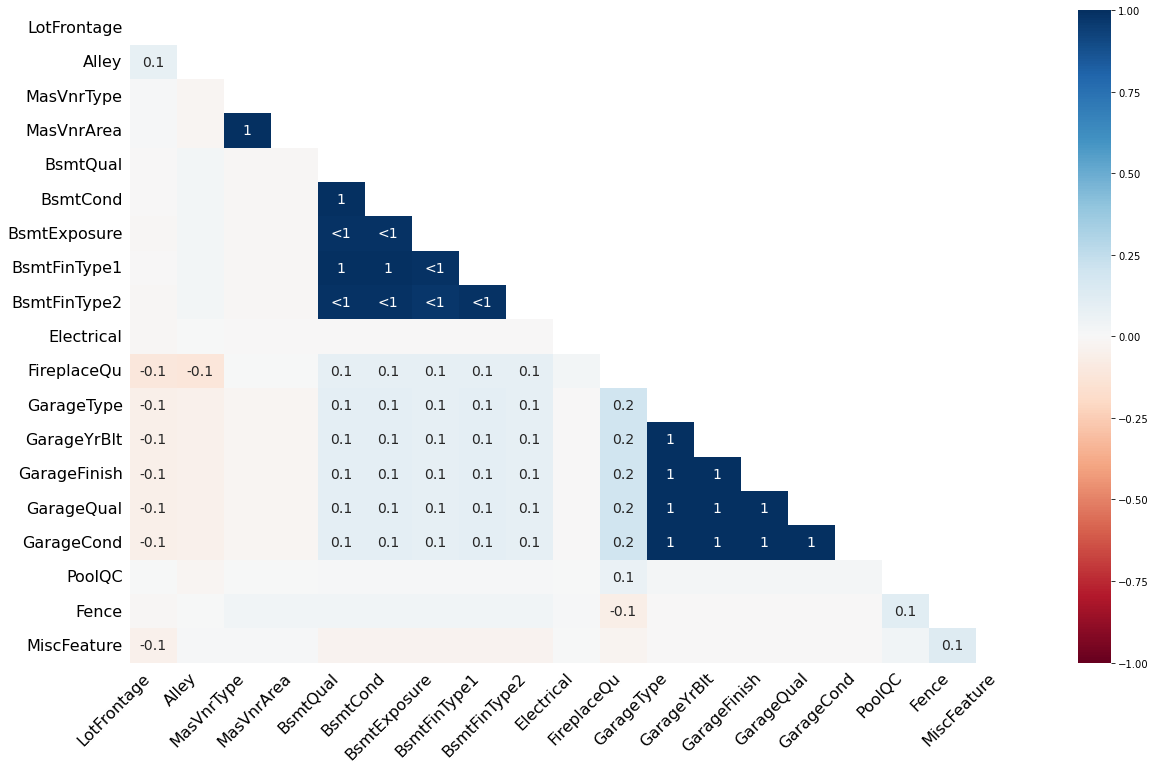

In [86]:
msno.heatmap(train)

We can see that many values are missing becuase they actually mean zero or not existing. we fill those with zeros and "No" and the remaining with mode if it's a ctegorical variable otherwise with mean.
Many columns which don't have NAs in train set have NAs in test set. we fill those NAs with respective values from train set.

In [87]:
#Missing features in train set
missing_features_train = [col for col in train.columns if train[col].isnull().any()]
missing_features_test = [col for col in test.columns if train[col].isnull().any()]
print('missing features in train set: ')
missing_features_train
print('missing features in test set: ')
missing_features_test

missing features in train set: 


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

missing features in test set: 


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Here we follow a most simple strategy.

In [88]:
#Let's fill those values.
values = {
     'LotFrontage' :train['LotFrontage'].mean() ,
     'Alley' : "No",
     'MasVnrType': 'No',
     'MasVnrArea': 0,
     'BsmtQual': 'No',
     'BsmtCond': 'No',
     'BsmtExposure': 'N',
     'BsmtFinType1': 'No',
     'BsmtFinType2': 'No',
     'Electrical': train['Electrical'].mode()[0],
     'FireplaceQu': 'No',
     'GarageType': 'No ',
     'GarageYrBlt': 0,
     'GarageFinish': 'No',
     'GarageQual': 'No',
     'GarageCond': 'No',
     'PoolQC': 'No',
     'Fence': 'No',
     'MiscFeature': 'No',
    #features missing in test set
     'MSZoning': train['MSZoning'].mode()[0],
     'Utilities': train['Utilities'].mode()[0],
     'Exterior1st': train['Exterior1st'].mode()[0],
     'Exterior2nd': train['Exterior2nd'].mode()[0],
     'BsmtFinSF1': 0,
     'BsmtFinSF2': 0,
     'BsmtUnfSF': 0,
     'TotalBsmtSF': 0,
     'BsmtFullBath': 0,
     'BsmtHalfBath': 0,
     'KitchenQual': train['KitchenQual'].mode()[0],
     'Functional': train['Functional'].mode()[0],
     'GarageCars': 0,
     'GarageArea': 0,
     'SaleType': train['SaleType'].mode()[0]
}
train.fillna(value=values, inplace=True)
test.fillna(value = values, inplace = True)

Let's check again is there any NAs in our data set.

In [89]:
train.isnull().sum().sort_values(ascending = False)
test.isnull().sum().sort_values(ascending = False)

MSSubClass     0
MSZoning       0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 80, dtype: int64

MSSubClass       0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
SaleCondition    0
Length: 79, dtype: int64

We convert all date columns from float values as categories.

In [90]:
train.YearBuilt = train.YearBuilt.astype(str)
test.YearBuilt = test.YearBuilt.astype(str)

train.YrSold = train.YrSold.astype(str)
test.YrSold = test.YrSold.astype(str)

train.GarageYrBlt = train.GarageYrBlt.astype(str)
test.GarageYrBlt = test.GarageYrBlt.astype(str)

train.YearRemodAdd = train.YearRemodAdd.astype(str)
test.YearRemodAdd = test.YearRemodAdd.astype(str)

train.MoSold = train.MoSold.astype(str)
test.MoSold = test.MoSold.astype(str)

## Exploratory Data Analysis

Checking correlation between Numerical Variables.

<Figure size 1800x1800 with 0 Axes>

<AxesSubplot:>

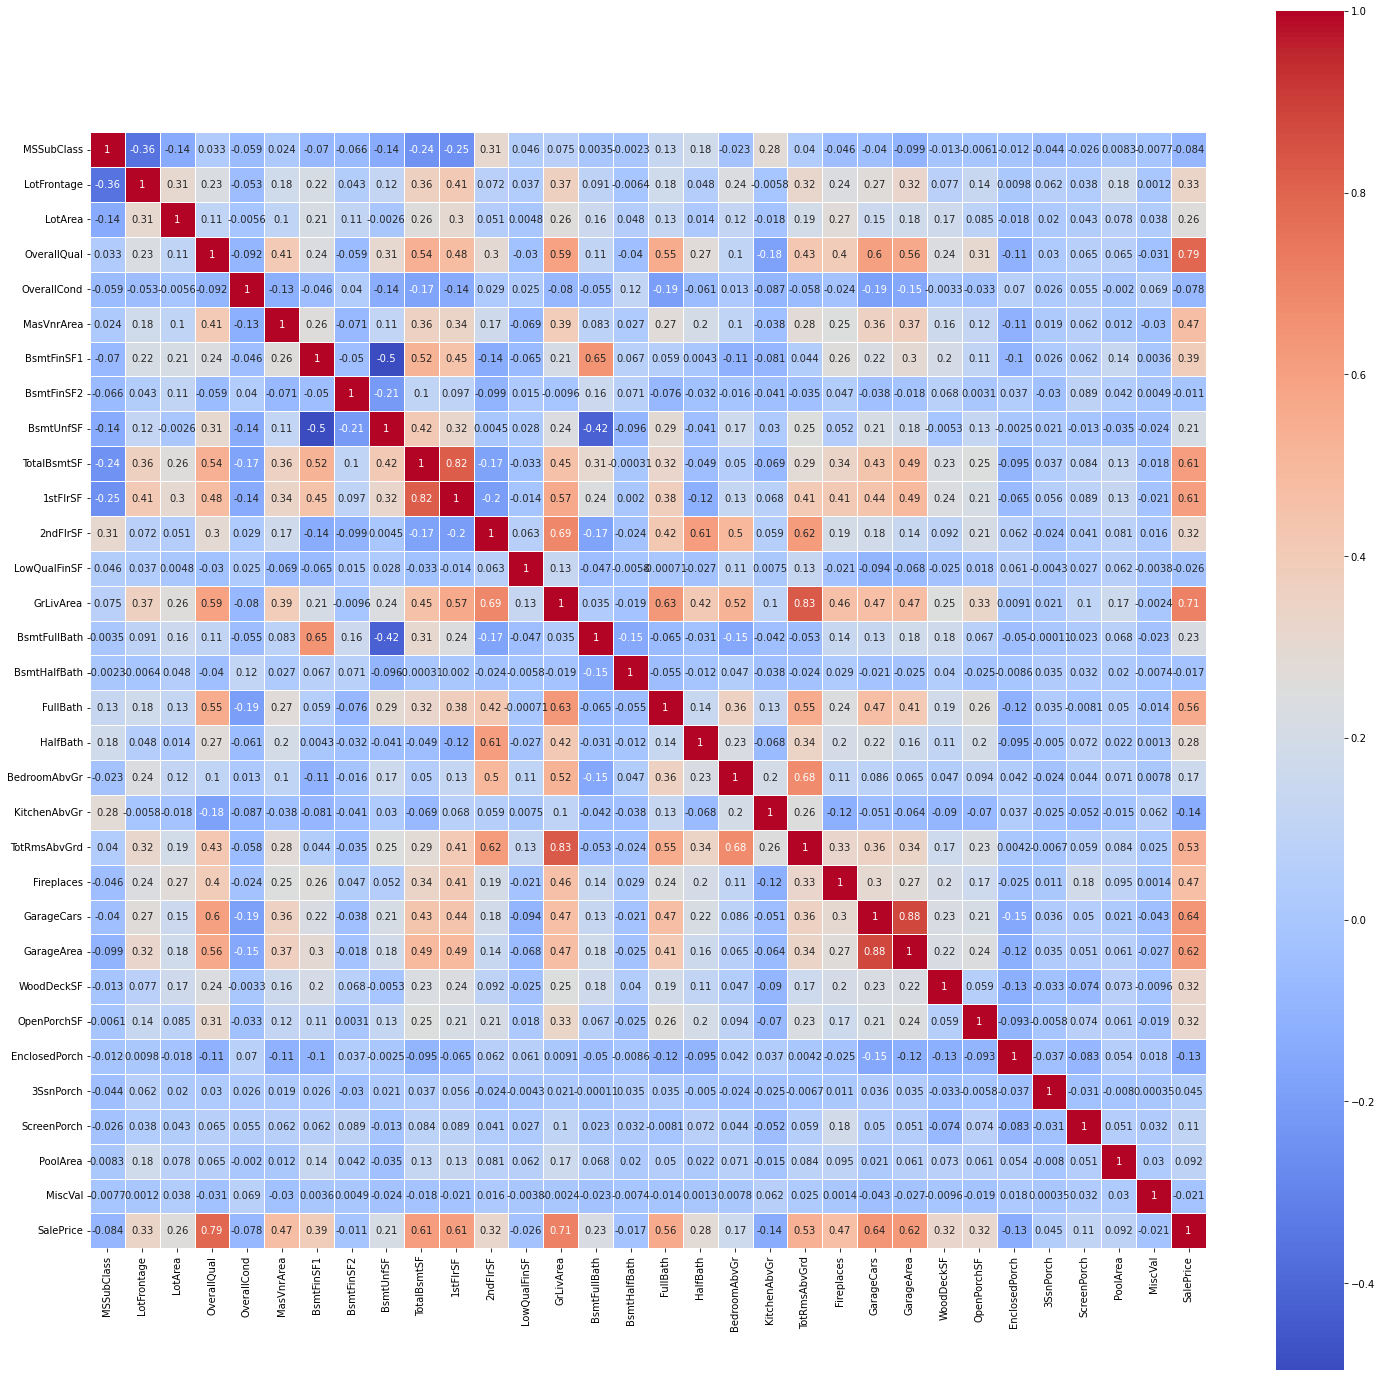

In [91]:
train_cor = train.corr()
plt.figure(figsize = (25,25))
sns.heatmap(train_cor,
           annot = True,
           square = True,
           linewidths = 1,
           cmap = 'coolwarm')

In [92]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


Let's check our target. It has a long tail. So we will log normalize it for further analysis.

C:\Users\pk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

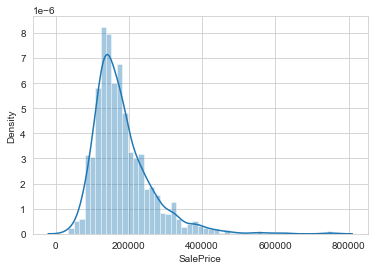

C:\Users\pk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

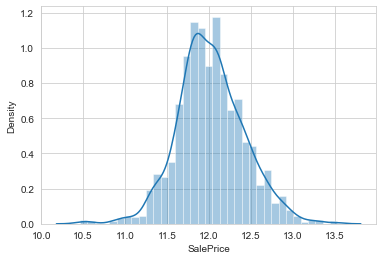

In [93]:
y = train.SalePrice

sns.set_style('whitegrid')
sns.distplot(y)
plt.show()

sns.distplot(np.log(y))
plt.show()

In [94]:
num_vars_t = train.select_dtypes(include = ['number']).columns
cat_vars_t = train.select_dtypes(include = ['object']).columns

print("number of numerical variables:")
len(num_vars)
print("number of categorical variables:")
len(cat_vars)

number of numerical variables:


36

number of categorical variables:


43

In [ ]:
for column in train.select_dtypes(include = ['object']).columns:
    plt.figure(figsize = (10,8))
    sns.boxplot(x = column,
               y = y,
               data = train)

In [120]:
for column in train.select_dtypes(include = ['number']).columns:
    plt.figure(figsize = (10,8))
    sns.scatterplot(x = column,
                   y = y,
                   data = train)

2

## Data Prparation

Let's drop target variable from the data set and join trainig set and test set for categorical encoding and scaling

In [107]:
X = train.drop("SalePrice", axis = 1)
y = np.log(train['SalePrice'])

data_full = pd.concat([X, test])

In [12]:
data_full.shape

(2919, 79)

We use one hot encoder for all categorical variable and standard scaler for numerical variables.

In [108]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_vars = data_full.select_dtypes(include = ['number']).columns
cat_vars = data_full.select_dtypes(include = ['object']).columns

cl_transform_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars),
    ("cat", OneHotEncoder(), cat_vars),
])

data_processed = cl_transform_pipeline.fit_transform(data_full)


In [190]:
data_processed.shape

(2919, 598)

In [109]:
X_train_full = data_processed[:1460]
X_test = data_processed[1460:]


In [15]:
X_train_full.shape
X_test.shape

(1460, 598)

(1459, 598)

## Modelling

### Assesment of Baseline Models

Our data is ready. We go for modelling now. Import Relevent models fro Sklearn.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

We select most common regression methods and run with default values on our data.
Then we will go on fine tuning models with promising results.

In [104]:
models = []
models.append(('lr', LinearRegression()))
models.append(('ridge', Ridge()))
models.append(('lasso', Lasso()))
models.append(('en', ElasticNet()))
models.append(('knn', KNeighborsRegressor()))
models.append(('svr', SVR()))
models.append(('rf', RandomForestRegressor()))
models.append(('ada', AdaBoostRegressor()))
models.append(('gbm', GradientBoostingRegressor()))
models.append(('xgbm', XGBRegressor()))

We will run a 10 fold cross validation on each model to get our metric. We use negative mean squared error as our metric. The lower is better.

In [13]:
num_folds = 10
seed = 45
scoring = 'neg_mean_squared_error'

In [63]:

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed,
                 shuffle= True)
    cv_results = cross_val_score(model, X_train_full, y,
                                cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name} {cv_results.mean()} {cv_results.std()}")

lr -0.034361548268853306 0.020127355442649715
ridg -0.024245899603150337 0.015659191440089107
lasso -0.1595214882071497 0.019497950943125623
en -0.1595214882071497 0.019497950943125623
knn -0.030302424609889755 0.007277678480925435
cart -0.04447145206505029 0.011661363239621317
svr -0.020419261399681966 0.007162655241740648
rf -0.020744704547334965 0.0051821955528164
ada -0.03137284607176767 0.004779626814765389
gbm -0.017004251857269063 0.004541794678957935
xgbm -0.020229819594026664 0.005568864300689183


Text(0.5, 0.98, 'lin reg performance')

{'whiskers': [<matplotlib.lines.Line2D at 0x11a11fa33a0>,
 'caps': [<matplotlib.lines.Line2D at 0x11a121c48e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a123aab20>,
 'medians': [<matplotlib.lines.Line2D at 0x11a1215b940>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a107cfe80>,
 'means': []}

[Text(1, 0, 'lr'),
 Text(2, 0, 'ridg'),
 Text(3, 0, 'lasso'),
 Text(4, 0, 'en'),
 Text(5, 0, 'knn'),
 Text(6, 0, 'cart'),
 Text(7, 0, 'svr'),
 Text(8, 0, 'rf'),
 Text(9, 0, 'ada'),
 Text(10, 0, 'gbm'),
 Text(11, 0, 'xgbm')]

<function matplotlib.pyplot.show(close=None, block=None)>

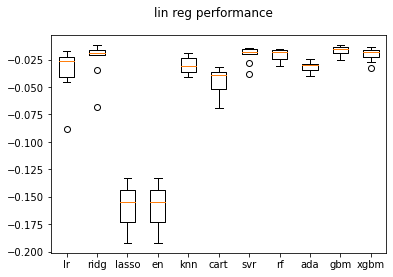

In [64]:
fig = plt.figure()
fig.suptitle("lin reg performance")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show

All regression methods except Lasso and Elastic net are promising. We will go on fine tuning hyperparameters for all those models.

## Grid Search and Parameter Tuning

In [119]:
#Function to find RMSE and Regression fit Score from a given model
def rmse_score(model):
    rmse = np.sqrt(mean_squared_error(model.predict(X_train_full), y))
    score = model.score(X_train_full, y)
    
    return rmse, score

#function to plot regression residuals vs target value.
def residual_plot(model):
    sns.scatterplot(x = model.predict(X_train_full) - y, y =y)
    

> We have tried many values while fine tuning models. we don't report each of them as running this notebook wil be time consuming. We report only  the last step for each regression model while experimenting with GridSearchCV

#### Linear Rigression

We keep Linear Regression as it is as a baseline model. 

LinearRegression()

0.08071357115410929

0.9591434419848447

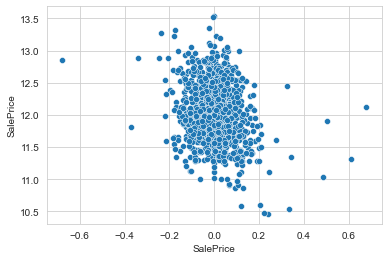

In [121]:
lr_reg = LinearRegression()
lr_reg.fit(X_train_full, y)

lr_rmse, lr_score = rmse_score(lr_reg)


lr_score
residual_plot(lr_reg)

#### Ridge Regression and Grid Search

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.3, 0.6, 0.8, 1, 2, 4, 8,
                                   10, 30, 50, 100]},
             scoring='neg_mean_squared_error')

{'alpha': 30}
-0.02004625391006785


Ridge(alpha=30)

0.9201009063289358

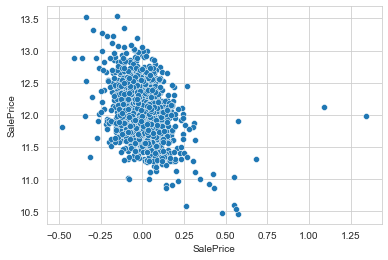

In [124]:
ridge = Ridge()
param_ridge = {'alpha' : [0.001, 0.01, 0.1, 0.3, 0.6, 0.8, 1, 2, 4, 8, 10, 30, 50, 100]}

gscv_ridge = GridSearchCV(ridge, param_ridge, 
                          cv = 10,
                         scoring = scoring)
gscv_ridge.fit(X_train_full, y)

print(gscv_ridge.best_params_)
print(gscv_ridge.best_score_)

ridge_reg = gscv_ridge.best_estimator_

ridge_reg.fit(X_train_full, y)
ridge_rmse, ridge_score = rmse_score(ridge_reg)


ridge_score
residual_plot(ridge_reg)

#### SVR Regression and Grid Search

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [3], 'epsilon': [0.003], 'gamma': ['auto'],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

{'C': 3, 'epsilon': 0.003, 'gamma': 'auto', 'kernel': 'rbf'}
-0.014504275928159338


SVR(C=3, epsilon=0.003, gamma='auto')

0.9502004572443856

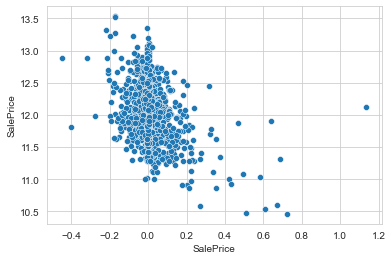

In [131]:
svr = SVR()
param_svr = {'C': [3], #[2, 4]
              'gamma': ['auto'], #['scale']
              'kernel': ['rbf'], #['poly'] #[degree = 2]
             'epsilon' : [0.003], #[0.02, 0.05]
            }

gscv_svr = GridSearchCV(svr, param_svr, 
                        cv = 10,
                        scoring = scoring,
                        n_jobs=-1)
gscv_svr.fit(X_train_full, y)

print(gscv_svr.best_params_)
print(gscv_svr.best_score_)

svr_reg = gscv_svr.best_estimator_

svr_reg.fit(X_train_full, y)
svr_rmse, svr_score = rmse_score(svr_reg)


svr_score
residual_plot(svr_reg)

In [132]:
#1 13381.966 best 
svr_rg3 = SVR()

svr_rg3.fit(X_train_full, y)
np.sqrt(mean_squared_error(svr_rg3.predict(X_train_full), y))
rmse_score(svr_rg3)

SVR()

0.07818560863806581

(0.07818560863806581, 0.9616626320560885)

In [19]:
svr_rg3.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### KNN 

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [12], 'weights': ['uniform']},
             scoring='neg_mean_squared_error')

{'n_neighbors': 12, 'weights': 'uniform'}
-0.02866883069380221


KNeighborsRegressor(n_neighbors=12)

0.8461803720719374

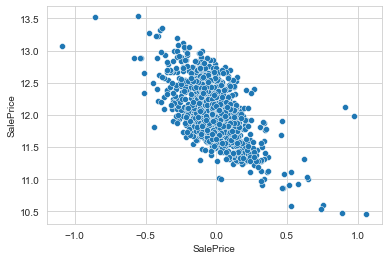

In [133]:
knn = KNeighborsRegressor()
param_knn = {'n_neighbors': [12], #np.arange(3,16)
             'weights': ['uniform'] #['distance']
            }

gscv_knn = GridSearchCV(knn, param_knn, 
                        cv = 10,
                        scoring = scoring,
                        n_jobs=-1)
gscv_knn.fit(X_train_full, y)

print(gscv_knn.best_params_)
print(gscv_knn.best_score_)

knn_reg = gscv_knn.best_estimator_

knn_reg.fit(X_train_full, y)
knn_rmse, knn_score = rmse_score(knn_reg)


knn_score
residual_plot(knn_reg)

KNeighborsRegressor(n_neighbors=12, weights='distance')

1.0

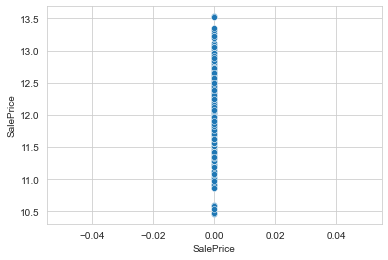

In [189]:
knn_reg2 = KNeighborsRegressor( n_neighbors= 12,
                              weights= 'distance')

knn_reg2.fit(X_train_full, y)
knn2_rmse, knn2_score = rmse_score(knn_reg2)


knn2_score
residual_plot(knn_reg2)

#### Random Tree Regresson

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15], 'max_leaf_nodes': [70],
                         'min_samples_leaf': [15], 'min_samples_split': [2],
                         'random_state': [45], 'splitter': ['best']},
             scoring='neg_mean_squared_error')

{'max_depth': 15, 'max_leaf_nodes': 70, 'min_samples_leaf': 15, 'min_samples_split': 2, 'random_state': 45, 'splitter': 'best'}
-0.031864282649972826


DecisionTreeRegressor(max_depth=15, max_leaf_nodes=70, min_samples_leaf=15,
                      random_state=45)

0.8716842654635577

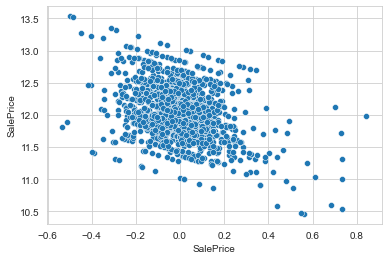

In [137]:
tree = DecisionTreeRegressor()
param_tree = {'max_depth': [15], #[3, 5, 8, 10]
             'max_leaf_nodes': [70], #[55, 60, 70, 80 ]
             'min_samples_leaf': [15], #[10,13, 15, 18,]
             'min_samples_split': [2], #[, 3]
             'random_state': [45],
             'splitter': ['best']
            }

gscv_tree = GridSearchCV(tree, param_tree, 
                        cv = 10,
                        scoring = scoring,
                        n_jobs=-1)
gscv_tree.fit(X_train_full, y)

print(gscv_tree.best_params_)
print(gscv_tree.best_score_)

tree_reg = gscv_tree.best_estimator_

tree_reg.fit(X_train_full, y)
tree_rmse, tree_score = rmse_score(tree_reg)


tree_score
residual_plot(tree_reg)

#### Random Forest Regression

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15], 'min_samples_split': [2],
                         'n_estimators': [100], 'random_state': [45]},
             scoring='neg_mean_squared_error')

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 45}
-0.019944881119689103


RandomForestRegressor(max_depth=15, random_state=45)

0.9818291729980344

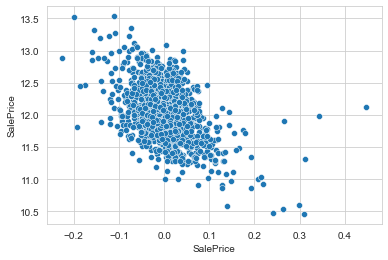

In [138]:
rf = RandomForestRegressor()
param_rf = {'max_depth': [15], #[5,15, 20]
             'min_samples_split': [2], #[, 3, 4]
             'n_estimators': [100], #[80, 100, 150, 200]
             'random_state': [45], 
}

gscv_rf = GridSearchCV(rf, param_rf, 
                        cv = 10,
                        scoring = scoring,
                        n_jobs=-1)
gscv_rf.fit(X_train_full, y)

print(gscv_rf.best_params_)
print(gscv_rf.best_score_)

rf_reg = gscv_rf.best_estimator_

rf_reg.fit(X_train_full, y)
rf_rmse, rf_score = rmse_score(rf_reg)


rf_score
residual_plot(rf_reg)

#### Adaboost

GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.6], 'n_estimators': [80],
                         'random_state': [45]},
             scoring='neg_mean_squared_error')

{'learning_rate': 0.6, 'n_estimators': 80, 'random_state': 45}
-0.030947551415733843


AdaBoostRegressor(learning_rate=0.6, n_estimators=80, random_state=45)

0.8419749747087618

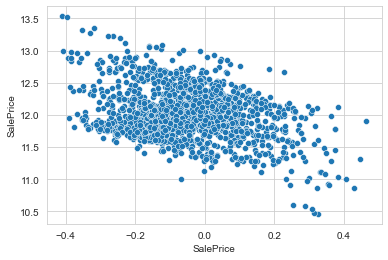

In [139]:
ada = AdaBoostRegressor()
param_ada = {'learning_rate':[0.6], #[0.5,  0.7,  0.8 ]
             'n_estimators': [80], #[50, 80, 100]
             'random_state': [45]
}

gscv_ada = GridSearchCV(ada, param_ada, 
                        cv = 10,
                        scoring = scoring,
                        n_jobs=-1)
gscv_ada.fit(X_train_full, y)

print(gscv_ada.best_params_)
print(gscv_ada.best_score_)

ada_reg = gscv_ada.best_estimator_

ada_reg.fit(X_train_full, y)
ada_rmse, ada_score = rmse_score(ada_reg)


ada_score
residual_plot(ada_reg)

#### Gradient Boost Regression

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'loss': ['huber'],
                         'max_depth': [3], 'min_samples_leaf': [2],
                         'n_estimators': [500], 'random_state': [45]},
             scoring='neg_mean_squared_error')

{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 500, 'random_state': 45}
-0.0159453853556574


GradientBoostingRegressor(loss='huber', min_samples_leaf=2, n_estimators=500,
                          random_state=45)

0.9780021151693041

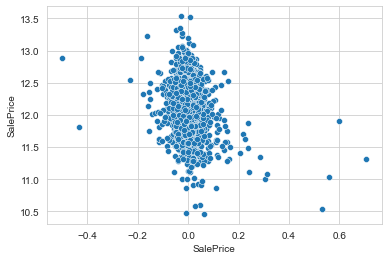

In [140]:
gbr = GradientBoostingRegressor()
param_gbr = {'learning_rate':[0.1], #[0.01, 0.15, 0.2]
             'n_estimators': [500], #[400, 700, 1000]
             'max_depth': [3], #[, 4]
             'min_samples_leaf': [2], #[5, 7]
             'loss': ['huber'],
             'random_state': [45]
}

gscv_gbr = GridSearchCV(gbr, param_gbr, 
                        cv = 10,
                        scoring = scoring,
                        n_jobs=-1)
gscv_gbr.fit(X_train_full, y)

print(gscv_gbr.best_params_)
print(gscv_gbr.best_score_)

gbr_reg = gscv_gbr.best_estimator_

gbr_reg.fit(X_train_full, y)
gbr_rmse, gbr_score = rmse_score(gbr_reg)


gbr_score
residual_plot(gbr_reg)

#### XGBoost Regression

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

{'colsample_bytree': 0.5, 'learning_rate': 0.017, 'max_depth': 3, 'n_estimators': 2800, 'random_state': 45, 'subsample': 0.5}
-0.01459903440781562


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.017, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2800, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=45,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

0.985749687018008

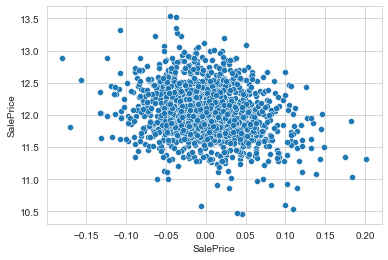

In [178]:
xgb = XGBRegressor()
param_xgb = {'learning_rate':[0.017], #[0.013, 0.016, 0.017, 0.18, 0.1, 0.001, 0.05]
             'n_estimators': [2800], #[2700, 2800, 3000, 500, 700, 1500, 1000]
             'max_depth': [3], #[4,5]
             'subsample': [0.5], #[0.8, 1]
             'colsample_bytree':[0.5],  #[0.8, 1]
             'random_state': [45]
}

gscv_xgb = GridSearchCV(xgb, param_xgb, 
                        cv = 5,
                        scoring = scoring,
                        n_jobs=-1)
gscv_xgb.fit(X_train_full, y)

print(gscv_xgb.best_params_)
print(gscv_xgb.best_score_)

xgb_reg = gscv_xgb.best_estimator_

xgb_reg.fit(X_train_full, y)
xgb_rmse, xgb_score = rmse_score(xgb_reg)


xgb_score
residual_plot(xgb_reg)

#### Ensemble Learning

#### Stacking

In [235]:
from sklearn.ensemble import StackingRegressor

estimators = [('lr', lr_reg),
              ('tree', tree_reg),
              ('ada', ada_reg),
              ('knn', knn_reg),
                  ('ridge', ridge_reg),
                  ('svr', svr_reg),
                  ('rf', rf_reg),
                  ('gbr', gbr_reg),
                  ('xgb', xgb_reg),]


stack_reg = StackingRegressor(estimators= estimators, final_estimator= XGBRegressor(), cv=5)
stack_reg.fit(X_train_full, y)

StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()),
                              ('tree',
                               DecisionTreeRegressor(max_depth=15,
                                                     max_leaf_nodes=70,
                                                     min_samples_leaf=15,
                                                     random_state=45)),
                              ('ada',
                               AdaBoostRegressor(learning_rate=0.6,
                                                 n_estimators=80,
                                                 random_state=45)),
                              ('knn', KNeighborsRegressor(n_neighbors=12)),
                              ('ridge', Ridge(alpha=30)),
                              ('svr', SVR(C=3, epsilon=0.003, gamma='auto'))...
                                               interaction_constraints=None,
                                               learning_rate=No

(0.07986808870509787, 0.9599949116689319)

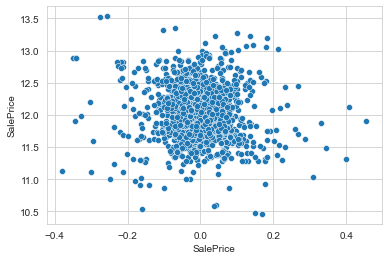

In [237]:
rmse_score(stack_reg)
residual_plot(stack_reg)

In [164]:
model_name = ['lr', 'ridge', 'knn', 'svr', 'tree', 'rf', 'ada', 'gbr', 'xgb']
model_score = [lr_score, ridge_score, knn_score, svr_score, tree_score, rf_score, ada_score, gbr_score, xgb_score]
model_rmse = [lr_rmse, ridge_rmse, knn_rmse, svr_rmse, tree_rmse, rf_rmse, ada_rmse, gbr_rmse, xgb_rmse]
models_reg = [lr_reg, ridge_reg, knn_reg, svr_reg, tree_reg, rf_reg, ada_reg, gbr_reg, xgb_reg]

In [160]:
scores_df = pd.DataFrame({'model': model_name, 'rmse': model_rmse, 'score': model_score})
scores_df.sort_values('rmse').reset_index(drop = True)

,model,rmse,score
0,xgb,0.047668,0.985750
1,rf,0.053827,0.981829
2,gbr,0.059225,0.978002
3,lr,0.080714,0.959143
4,svr,0.089110,0.950200
5,ridge,0.112872,0.920101
6,tree,0.143039,0.871684
7,knn,0.156611,0.846180
8,ada,0.158737,0.841975


In [197]:
stack1 = (0.8 * svr_reg.predict(X_test)) + (0.05 * rf_reg.predict(X_test)) + (0.05 * xgb_reg.predict(X_test)) + (0.04 * gbr_reg.predict(X_test)) + (0.03 * lr_reg.predict(X_test)) + (0.03 * ridge_reg.predict(X_test)) 

In [200]:
stack2 = (0.6 * svr_reg.predict(X_test)) + (0.1 * rf_reg.predict(X_test)) + (0.1 * xgb_reg.predict(X_test)) + (0.08 * gbr_reg.predict(X_test)) + (0.06 * lr_reg.predict(X_test)) + (0.06 * ridge_reg.predict(X_test)) 

In [210]:
dic = {}
for i, model in enumerate(model_name):
    dic[model] = np.exp(models_reg[i].predict(X_train_full))

In [240]:
prediction_df = pd.DataFrame(dic)
prediction_df2 = prediction_df[['lr', 'ridge', 'svr', 'rf', 'gbr', 'xgb']]
actual = np.exp(y)
prediction_df2.head()

,lr,ridge,svr,rf,gbr,xgb
0,206637.927547,205001.644436,209315.311124,204171.460745,204359.119863,206514.875000
1,201973.759555,193634.492911,184824.291653,174577.513289,177941.768609,177931.562500
2,215049.723754,218735.856496,212868.919550,220047.008694,206792.883346,214480.328125
3,171513.699084,180766.120720,173053.242069,161704.779321,151266.963691,157865.343750
4,282834.628159,301589.499596,277828.749771,266303.510490,277548.705615,283435.250000


In [241]:
lr_df = LinearRegression()
lr_df.fit(prediction_df2, actual)
np.sqrt(mean_squared_error(lr_df.predict(prediction_df2), actual))

LinearRegression()

7493.316687370537

In [242]:
lr_df.coef_

array([ 0.05510959, -0.17940057, -0.10807022,  0.53685512,  0.06842477,
        0.65395694])

lr


<AxesSubplot:ylabel='SalePrice'>

Text(0.5, 1.0, 'lr Residual Plot')

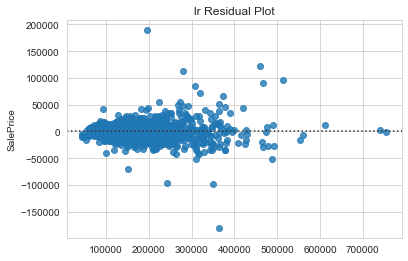

ridge


<AxesSubplot:ylabel='SalePrice'>

Text(0.5, 1.0, 'ridge Residual Plot')

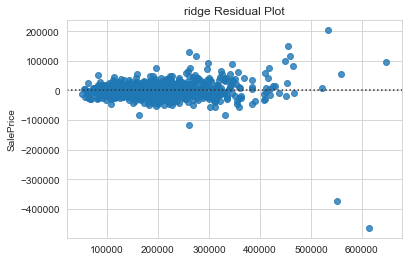

knn


<AxesSubplot:ylabel='SalePrice'>

Text(0.5, 1.0, 'knn Residual Plot')

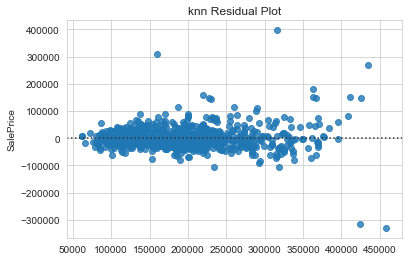

svr


<AxesSubplot:ylabel='SalePrice'>

Text(0.5, 1.0, 'svr Residual Plot')

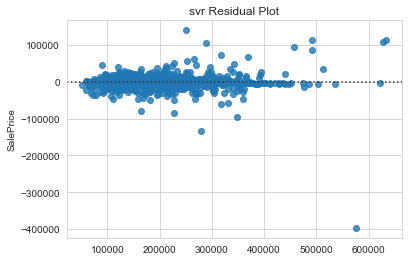

tree


<AxesSubplot:ylabel='SalePrice'>

Text(0.5, 1.0, 'tree Residual Plot')

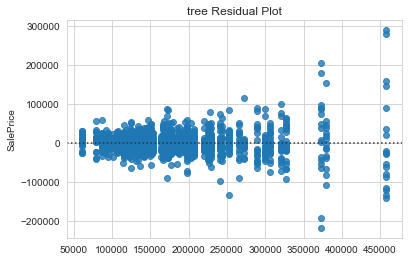

rf


<AxesSubplot:ylabel='SalePrice'>

Text(0.5, 1.0, 'rf Residual Plot')

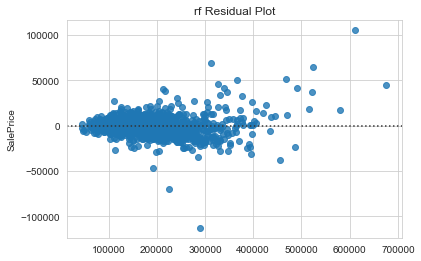

ada


<AxesSubplot:ylabel='SalePrice'>

Text(0.5, 1.0, 'ada Residual Plot')

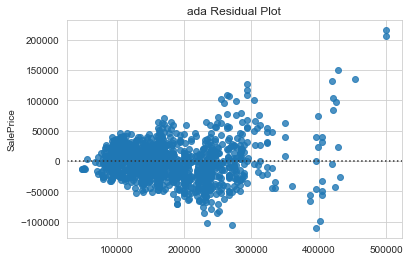

gbr


<AxesSubplot:ylabel='SalePrice'>

Text(0.5, 1.0, 'gbr Residual Plot')

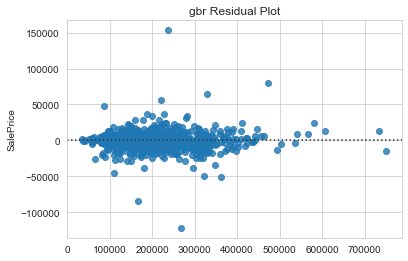

xgb


<AxesSubplot:ylabel='SalePrice'>

Text(0.5, 1.0, 'xgb Residual Plot')

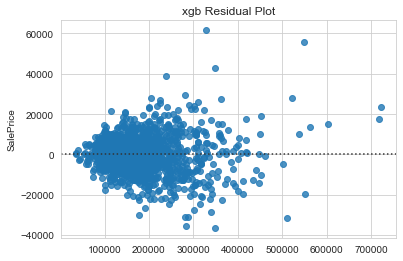

In [173]:
for i, model in enumerate(models_reg):
    print(model_name[i])
    sns.residplot(np.exp(model.predict(X_train_full)), np.exp(y))
    plt.title(f"{model_name[i]} Residual Plot")
    plt.show()
    


In [268]:
stack_mean = (0.5 * svr_reg.predict(X_test)) \
+ (0.1 * rf_reg.predict(X_test)) \
+ (0.1 * xgb_reg.predict(X_test)) \
+ (0.1 * gbr_reg.predict(X_test)) \
+ (0.05 * lr_reg.predict(X_test)) \
+ (0.05 * ridge_reg.predict(X_test)) \
+ (0.02 * tree_reg.predict(X_test)) \
+ (0.02 * ada_reg.predict(X_test)) \
+ (0.06 * knn_reg.predict(X_test)) 


In [264]:
bagg = prediction_df.mean(axis =1)

In [269]:
print('\nPredicting target...\n')

test_preds = pd.DataFrame.from_dict({'Id': np.arange(1461, 1461+1459),
                                     'SalePrice': np.exp(stack_mean)})

test_preds.head()



print('\nSaving output...')

test_preds.to_csv('submission.csv', index=False)

print('\nSaved successfully!\n')


Predicting target...



,Id,SalePrice
0,1461,122644.758689
1,1462,160318.779976
2,1463,186213.252733
3,1464,194289.883720
4,1465,185115.796184



Saving output...

Saved successfully!

